# Transfer Rate Comparison - Marcus vs. MLJ Theory 

### Modelled after https://doi.org/10.1021/acs.jpcc.7b09213

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpmath import nsum, exp, inf
import math

#### Parameters & Variables

In [2]:
k = 1.38064852*10**(-23) #[m2*kg/(s2*K)]
k_eV = 8.617333262145*10**(-5) #[eV/K]
hbar = 1.0545718*10**(-34) #[m2*kg / s]
hbar_eV = 6.5821*10**(-16) #[eV/s] 

In [3]:
I_DA = 0.03 #[eV]
lam = 0.3 #[eV]
lam_o = 0.5*0.3 #[eV]
hbar_w_i = 0.165 #[eV]
S_i = 1
sig = 0.05 #[eV]

In [4]:
del_G0_list = np.arange(-1,0.2, 0.01)
T = [5, 20, 50, 150, 300, 500]

#### Calculations on dynamic disorder

In [5]:
dyn_sig_dict = {}
for t in T:
    dyn_sig = 2*k_eV*t*lam #[eV]
    dyn_sig_dict[str(t)+' K'] = str(dyn_sig)+' eV'
    print(str(t)+' K = '+str(dyn_sig)+' eV')

5 K = 0.00025851999786435 eV
20 K = 0.0010340799914574 eV
50 K = 0.0025851999786435 eV
150 K = 0.0077555999359305 eV
300 K = 0.015511199871861 eV
500 K = 0.025851999786434997 eV


### Transfer Rates - Marcus Theory

In [6]:
def Marcus_transfer_rates(del_G0_list, T, lam):
    Marcus_k_list = []
    
    for del_G0 in del_G0_list:
        k_ = (I_DA**2 / hbar_eV) * math.sqrt(math.pi/(lam*k_eV*T)) * math.exp(-(lam+del_G0)**2 / (4*lam*k_eV*T))
        Marcus_k_list.append(k_)
        
    return Marcus_k_list      

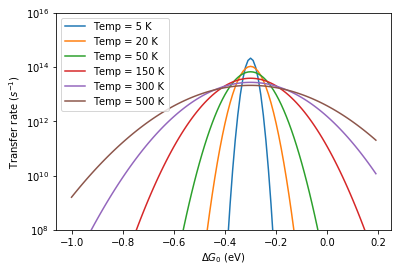

In [8]:
for t in T:
    Marcus_k_list = Marcus_transfer_rates(del_G0_list, t, lam)
    plt.semilogy(del_G0_list, Marcus_k_list, label='Temp = '+str(t)+' K')

plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.legend()
plt.show()

##### Including Disorder

In [9]:
def Marcus_disorder_transfer_rates(del_G0_list, T, lam, sig):
    Marcus_disorder_k_list = []
    
    for del_G0 in del_G0_list:
        k_ = (I_DA**2 / hbar_eV) * math.sqrt(math.pi/(lam*k_eV*T+sig**2)) \
        * math.exp(-(lam+del_G0)**2 / (4*lam*k_eV*T+2*sig**2))
        Marcus_disorder_k_list.append(k_)
        
    return Marcus_disorder_k_list

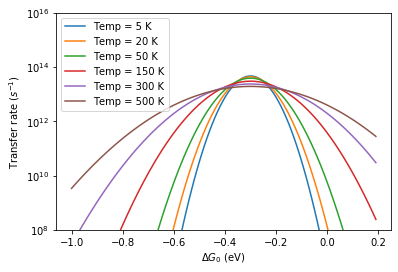

In [10]:
for t in T:
    Marcus_disorder_k_list = Marcus_disorder_transfer_rates(del_G0_list, t,lam, sig)
    plt.semilogy(del_G0_list, Marcus_disorder_k_list, label='Temp = '+str(t)+' K')

plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.legend()
plt.show()

##### Comparison

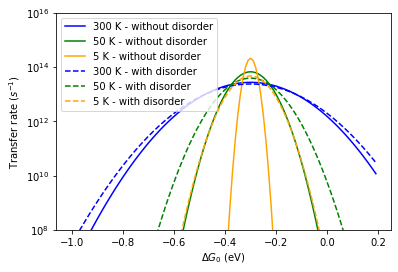

In [11]:
plt.semilogy(del_G0_list, Marcus_transfer_rates(del_G0_list, 300, lam), label='300 K - without disorder', linestyle = '-', color='blue')
plt.semilogy(del_G0_list, Marcus_transfer_rates(del_G0_list, 50, lam), label='50 K - without disorder', linestyle = '-', color='green')
plt.semilogy(del_G0_list, Marcus_transfer_rates(del_G0_list, 5, lam), label='5 K - without disorder', linestyle = '-', color='orange')

plt.semilogy(del_G0_list, Marcus_disorder_transfer_rates(del_G0_list, 300, lam, sig), label='300 K - with disorder', linestyle = '--', color='blue')
plt.semilogy(del_G0_list, Marcus_disorder_transfer_rates(del_G0_list, 50, lam, sig), label='50 K - with disorder', linestyle = '--', color='green')
plt.semilogy(del_G0_list, Marcus_disorder_transfer_rates(del_G0_list, 5, lam, sig), label='5 K - with disorder', linestyle = '--', color='orange')

plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.legend()
plt.show()

### Transfer Rates - Marcus Levich Jortner Theory

In [12]:
def MLJ_transfer_rates(del_G0_list, T, lam_o, S_i, hbar_w_i):
    MLJ_k_list = []
    
    for del_G0 in del_G0_list:
        k_ = (I_DA**2 / hbar_eV) * math.sqrt(math.pi/(lam_o*k_eV*T)) \
        * nsum(lambda v: (math.exp(-S_i)*S_i**v / (math.factorial(v))) \
        * math.exp(-(del_G0+lam_o+v*hbar_w_i)**2 / (4*lam_o*k_eV*T)), [0, inf])
        MLJ_k_list.append(k_)
        
    return MLJ_k_list      

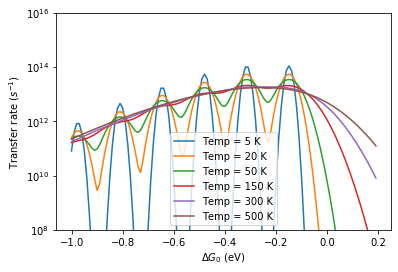

In [14]:
for t in T:
    MLJ_k_list = MLJ_transfer_rates(del_G0_list, t, lam_o, S_i, hbar_w_i)
    plt.semilogy(del_G0_list, MLJ_k_list, label='Temp = '+str(t)+' K')
    
plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.legend()
plt.show()

##### Including Disorder

In [15]:
def MLJ_disorder_transfer_rates(del_G0_list, T, lam_o, S_i, hbar_w_i, sig):
    MLJ_disorder_k_list = []
    
    for del_G0 in del_G0_list:
        k_ = (I_DA**2 / hbar_eV) * math.sqrt(math.pi/(lam_o*k_eV*T + sig**2)) \
        * nsum(lambda v: (math.exp(-S_i)*S_i**v / (math.factorial(v))) \
        * math.exp(-(del_G0+lam_o+v*hbar_w_i)**2 / (4*lam_o*k_eV*T + 2*sig**2)), [0, inf])
        MLJ_disorder_k_list.append(k_)
        
    return MLJ_disorder_k_list   

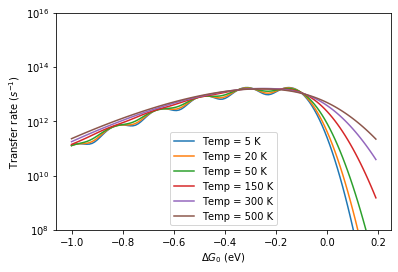

In [16]:
for t in T:
    MLJ_disorder_k_list = MLJ_disorder_transfer_rates(del_G0_list, t, lam_o, S_i, hbar_w_i, sig)
    plt.semilogy(del_G0_list, MLJ_disorder_k_list, label='Temp = '+str(t)+' K')

plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.legend()
plt.show()

#####  Comparison

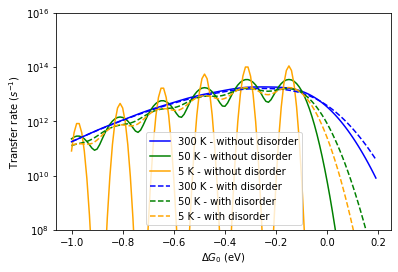

In [17]:
plt.semilogy(del_G0_list, MLJ_transfer_rates(del_G0_list, 300, lam_o, S_i, hbar_w_i), label='300 K - without disorder', linestyle = '-', color='blue')
plt.semilogy(del_G0_list, MLJ_transfer_rates(del_G0_list, 50, lam_o, S_i, hbar_w_i), label='50 K - without disorder', linestyle = '-', color='green')
plt.semilogy(del_G0_list, MLJ_transfer_rates(del_G0_list, 5, lam_o, S_i, hbar_w_i), label='5 K - without disorder', linestyle = '-', color='orange')

plt.semilogy(del_G0_list, MLJ_disorder_transfer_rates(del_G0_list, 300, lam_o, S_i, hbar_w_i, sig), label='300 K - with disorder', linestyle = '--', color='blue')
plt.semilogy(del_G0_list, MLJ_disorder_transfer_rates(del_G0_list, 50, lam_o, S_i, hbar_w_i, sig), label='50 K - with disorder', linestyle = '--', color='green')
plt.semilogy(del_G0_list, MLJ_disorder_transfer_rates(del_G0_list, 5, lam_o, S_i, hbar_w_i, sig), label='5 K - with disorder', linestyle = '--', color='orange')

plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.legend()
plt.show()

## Experimenting with parameters

In [18]:
del_G0_list = np.arange(-1,0.2, 0.01)
T_2 = [20, 300, 600]

In [19]:
lam_list = [0.01, 0.05, 0.1, 0.3, 0.5, 0.7]
sig_list = [0.01, 0.025, 0.05, 0.075, 0.1, 0.2]
S_list = [0.5, 0.8, 1, 1.2, 1.5]
vib_Quant_list = [0.05, 0.1, 0.165, 0.2, 0.25]

### Marcus Theory - No Disorder

##### Dependence on lambda

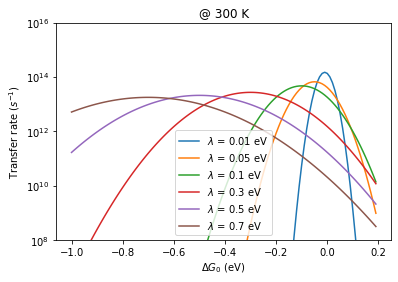

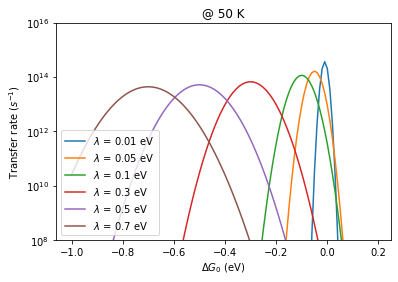

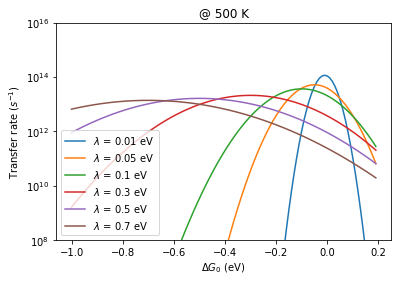

In [20]:
for l in lam_list:
    Marcus_k_list_l = Marcus_transfer_rates(del_G0_list, 300, l)
    plt.semilogy(del_G0_list, Marcus_k_list_l, label='$\lambda$ = '+str(l)+' eV')
plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.title('@ 300 K')
plt.legend()
plt.show()

for l in lam_list:
    Marcus_k_list_l = Marcus_transfer_rates(del_G0_list, 50, l)
    plt.semilogy(del_G0_list, Marcus_k_list_l, label='$\lambda$ = '+str(l)+' eV')
plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.title('@ 50 K')
plt.legend()
plt.show()

for l in lam_list:
    Marcus_k_list_l = Marcus_transfer_rates(del_G0_list, 500, l)
    plt.semilogy(del_G0_list, Marcus_k_list_l, label='$\lambda$ = '+str(l)+' eV')
plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.title('@ 500 K')
plt.legend()
plt.show()

##### Dependence on the electronic coupling

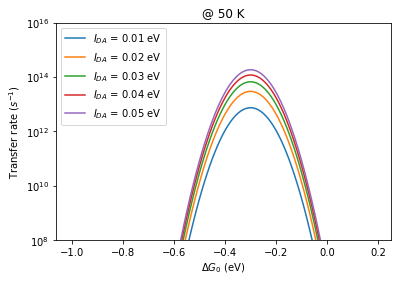

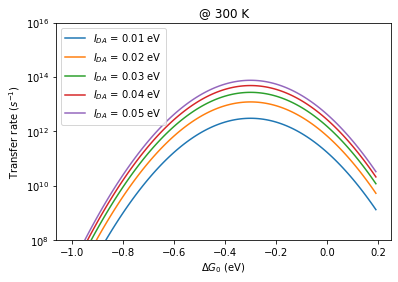

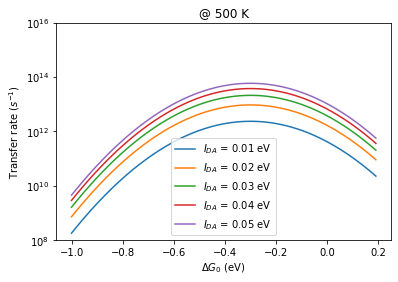

In [21]:
del_G0_list = np.arange(-1,0.2, 0.01)

I_DA_list = [0.01, 0.02, 0.03, 0.04, 0.05] #[eV]
lam = 0.3 #[eV]

for I in I_DA_list:
    I_DA = I
    Marcus_k_list_l = Marcus_transfer_rates(del_G0_list, 50, lam)
    plt.semilogy(del_G0_list, Marcus_k_list_l, label='$I_{DA}$ = '+str(I)+' eV')
plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.title('@ 50 K')
plt.legend()
plt.show()

for I in I_DA_list:
    I_DA = I
    Marcus_k_list_l = Marcus_transfer_rates(del_G0_list, 300, lam)
    plt.semilogy(del_G0_list, Marcus_k_list_l, label='$I_{DA}$ = '+str(I)+' eV')
plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.title('@ 300 K')
plt.legend()
plt.show()

for I in I_DA_list:
    I_DA = I
    Marcus_k_list_l = Marcus_transfer_rates(del_G0_list, 500, lam)
    plt.semilogy(del_G0_list, Marcus_k_list_l, label='$I_{DA}$ = '+str(I)+' eV')
plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.title('@ 500 K')
plt.legend()
plt.show()

I_DA = 0.03

### Marcus Theory - Including Disorder

##### Dependence on disorder (sigma)

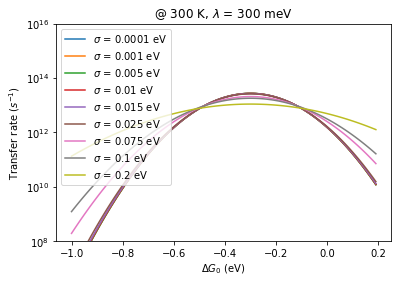

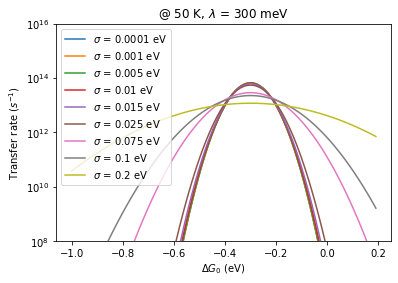

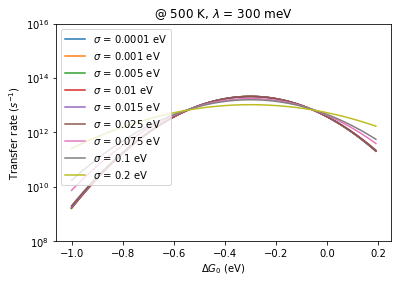

In [23]:
sig_list_2 = [0.0001, 0.001, 0.005, 0.01, 0.015, 0.025, 0.075, 0.1, 0.2]

for s in sig_list_2:
    Marcus_disorder_k_list_s = Marcus_disorder_transfer_rates(del_G0_list, 300, lam, s)
    plt.semilogy(del_G0_list, Marcus_disorder_k_list_s, label='$\sigma$ = '+str(s)+' eV')
plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.title('@ 300 K, $\lambda$ = 300 meV')
plt.legend()
plt.show()

for s in sig_list_2:
    Marcus_disorder_k_list_s = Marcus_disorder_transfer_rates(del_G0_list, 50, lam, s)
    plt.semilogy(del_G0_list, Marcus_disorder_k_list_s, label='$\sigma$ = '+str(s)+' eV')
plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.title('@ 50 K, $\lambda$ = 300 meV')
plt.legend()
plt.show()

for s in sig_list_2:
    Marcus_disorder_k_list_s = Marcus_disorder_transfer_rates(del_G0_list, 500, lam, s)
    plt.semilogy(del_G0_list, Marcus_disorder_k_list_s, label='$\sigma$ = '+str(s)+' eV')
plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.title('@ 500 K, $\lambda$ = 300 meV')
plt.legend()
plt.show()

##### Disorder and Temperature

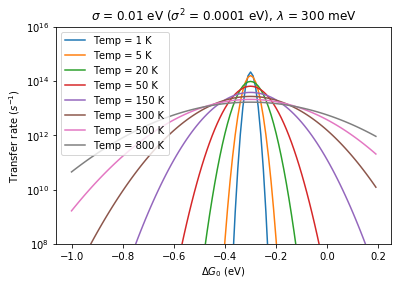

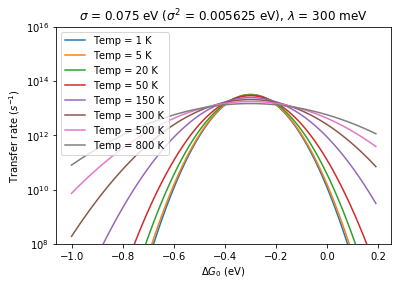

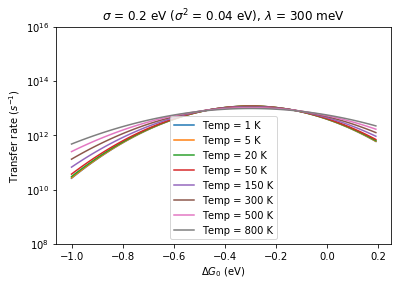

In [24]:
T_3 = [1, 5, 20, 50, 150, 300, 500, 800]

for t in T_3:
    Marcus_disorder_k_list_s = Marcus_disorder_transfer_rates(del_G0_list, t, lam, 0.01)
    plt.semilogy(del_G0_list, Marcus_disorder_k_list_s, label='Temp = '+str(t)+' K')
plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.title('$\sigma$ = 0.01 eV ($\sigma^2$ = 0.0001 eV), $\lambda$ = 300 meV')
plt.legend()
plt.show()

for t in T_3:
    Marcus_disorder_k_list_s = Marcus_disorder_transfer_rates(del_G0_list, t, lam, 0.075)
    plt.semilogy(del_G0_list, Marcus_disorder_k_list_s, label='Temp = '+str(t)+' K')
plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.title('$\sigma$ = 0.075 eV ($\sigma^2$ = 0.005625 eV), $\lambda$ = 300 meV')
plt.legend()
plt.show()

for t in T_3:
    Marcus_disorder_k_list_s = Marcus_disorder_transfer_rates(del_G0_list, t, lam, 0.2)
    plt.semilogy(del_G0_list, Marcus_disorder_k_list_s, label='Temp = '+str(t)+' K')
plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.title('$\sigma$ = 0.2 eV ($\sigma^2$ = 0.04 eV), $\lambda$ = 300 meV')
plt.legend()
plt.show()

In [54]:
dyn_list = [0.01, 0.075, 0.2]
for dyn in dyn_list:
    T_equi = dyn**2 / (2*k_eV*lam)
    print('sig_D^2: '+str(dyn)+' eV = '+str(T_equi)+' K')

sig_D^2: 0.01 eV = 1.9340863535917203 K
sig_D^2: 0.075 eV = 108.79235738953426 K
sig_D^2: 0.2 eV = 773.6345414366882 K


### MLJ Theory - No Disorder

##### Dependence on lambda (intermolecular reorganization energy)

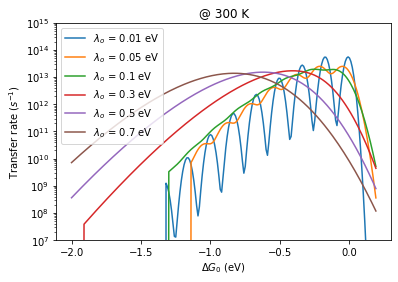

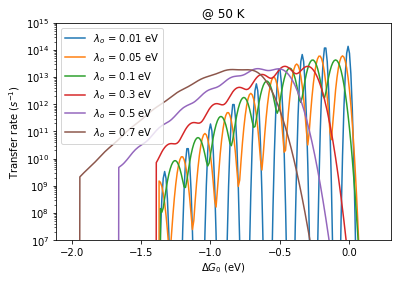

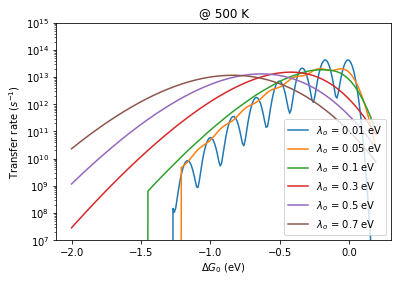

In [25]:
del_G0_list = np.arange(-2,0.2, 0.01)

for l_o in lam_list:
    MLJ_k_list_l = MLJ_transfer_rates(del_G0_list, 300, l_o, S_i, hbar_w_i)
    plt.semilogy(del_G0_list, MLJ_k_list_l, label='$\lambda_o$ = '+str(l_o)+' eV')    
plt.ylim(10**7, 10**15)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.title('@ 300 K')
plt.legend()
plt.show()  

for l_o in lam_list:
    MLJ_k_list_l = MLJ_transfer_rates(del_G0_list, 50, l_o, S_i, hbar_w_i)
    plt.semilogy(del_G0_list, MLJ_k_list_l, label='$\lambda_o$ = '+str(l_o)+' eV')    
plt.ylim(10**7, 10**15)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.title('@ 50 K')
plt.legend()
plt.show() 

for l_o in lam_list:
    MLJ_k_list_l = MLJ_transfer_rates(del_G0_list, 500, l_o, S_i, hbar_w_i)
    plt.semilogy(del_G0_list, MLJ_k_list_l, label='$\lambda_o$ = '+str(l_o)+' eV')    
plt.ylim(10**7, 10**15)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.title('@ 500 K')
plt.legend()
plt.show()  

##### Dependence on the Huang-Rhys parameter

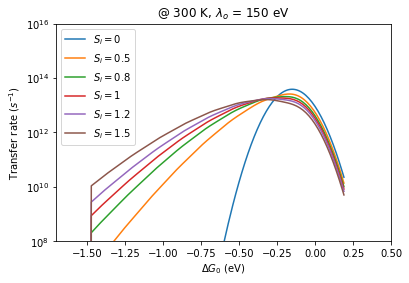

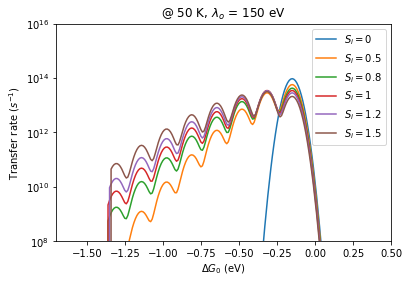

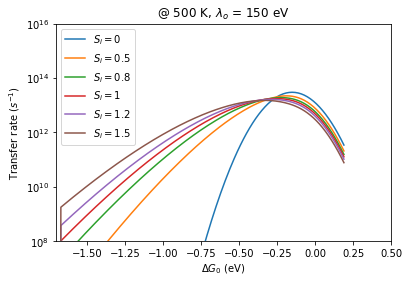

In [26]:
S_list = [0, 0.5, 0.8, 1, 1.2, 1.5]

for S in S_list:
    MLJ_k_list_S = MLJ_transfer_rates(del_G0_list, 300, lam_o, S, hbar_w_i)
    plt.semilogy(del_G0_list, MLJ_k_list_S, label='$S_i = $'+str(S))
plt.xlim(-1.7, 0.5)
plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.title('@ 300 K, $\lambda_{o}$ = 150 eV')
plt.legend()
plt.show()  

for S in S_list:
    MLJ_k_list_S = MLJ_transfer_rates(del_G0_list, 50, lam_o, S, hbar_w_i)
    plt.semilogy(del_G0_list, MLJ_k_list_S, label='$S_i = $'+str(S))
plt.xlim(-1.7, 0.5)
plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.title('@ 50 K, $\lambda_{o}$ = 150 eV')
plt.legend()
plt.show() 

for S in S_list:
    MLJ_k_list_S = MLJ_transfer_rates(del_G0_list, 500, lam_o, S, hbar_w_i)
    plt.semilogy(del_G0_list, MLJ_k_list_S, label='$S_i = $'+str(S))  
plt.xlim(-1.7, 0.5)
plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.title('@ 500 K, $\lambda_{o}$ = 150 eV')
plt.legend()
plt.show()  

##### Dependence on vibrational quanta

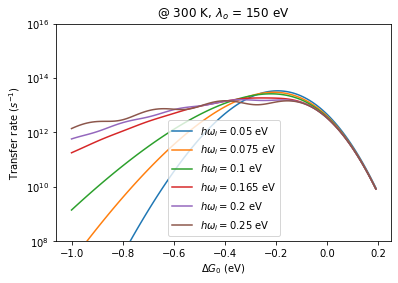

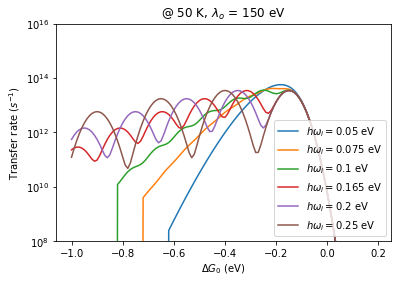

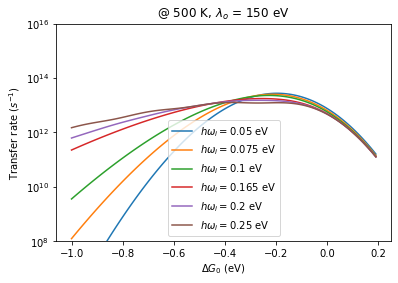

In [29]:
vib_Quant_list = [0.05, 0.075, 0.1, 0.165, 0.2, 0.25]
del_G0_list = np.arange(-1,0.2, 0.01)

for hw in vib_Quant_list:
    MLJ_k_list_hw = MLJ_transfer_rates(del_G0_list, 300, lam_o, S_i, hw)
    plt.semilogy(del_G0_list, MLJ_k_list_hw, label='$h\omega_{i} = $'+str(hw)+' eV')    
plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.title('@ 300 K, $\lambda_{o}$ = 150 eV')
plt.legend()
plt.show()  

for hw in vib_Quant_list:
    MLJ_k_list_hw = MLJ_transfer_rates(del_G0_list, 50, lam_o, S_i, hw)
    plt.semilogy(del_G0_list, MLJ_k_list_hw, label='$h\omega_{i} = $'+str(hw)+' eV')   
plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.title('@ 50 K, $\lambda_{o}$ = 150 eV')
plt.legend()
plt.show() 

for hw in vib_Quant_list:
    MLJ_k_list_hw = MLJ_transfer_rates(del_G0_list, 500, lam_o, S_i, hw)
    plt.semilogy(del_G0_list, MLJ_k_list_hw, label='$h\omega_{i} = $'+str(hw)+' eV')    
plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.title('@ 500 K, $\lambda_{o}$ = 150 eV')
plt.legend()
plt.show()  

### MLJ Theory - Including Disorder

##### Dependence on disorder (sigma)

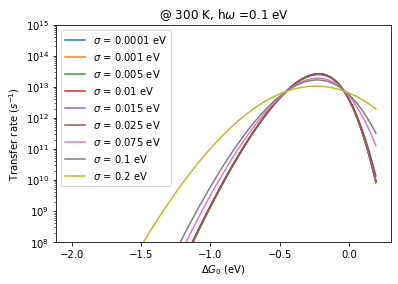

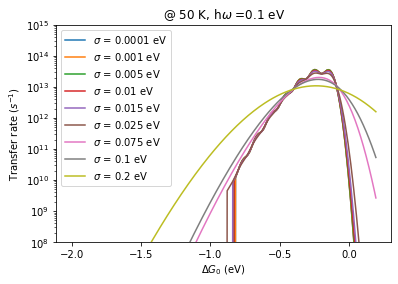

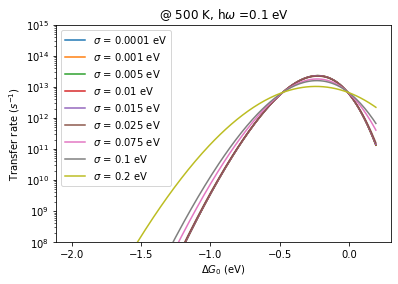

In [30]:
del_G0_list = np.arange(-2,0.2, 0.01)
sig_list_2 = [0.0001, 0.001, 0.005, 0.01, 0.015, 0.025, 0.075, 0.1, 0.2]
hbar_w_i = 0.1

for s in sig_list_2:
    MLJ_disorder_k_list_s = MLJ_disorder_transfer_rates(del_G0_list, 300, lam_o, S_i, hbar_w_i, s)
    plt.semilogy(del_G0_list, MLJ_disorder_k_list_s, label='$\sigma$ = '+str(s)+' eV')
plt.ylim(10**8, 10**15)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.title('@ 300 K, h$\omega$ ='+str(hbar_w_i)+' eV')
plt.legend()
plt.show()

for s in sig_list_2:
    MLJ_disorder_k_list_s = MLJ_disorder_transfer_rates(del_G0_list, 50, lam_o, S_i, hbar_w_i, s)
    plt.semilogy(del_G0_list, MLJ_disorder_k_list_s, label='$\sigma$ = '+str(s)+' eV')
plt.ylim(10**8, 10**15)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.title('@ 50 K, h$\omega$ ='+str(hbar_w_i)+' eV')
plt.legend()
plt.show()

for s in sig_list_2:
    MLJ_disorder_k_list_s = MLJ_disorder_transfer_rates(del_G0_list, 500, lam_o, S_i, hbar_w_i, s)
    plt.semilogy(del_G0_list, MLJ_disorder_k_list_s, label='$\sigma$ = '+str(s)+' eV')
plt.ylim(10**8, 10**15)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.title('@ 500 K, h$\omega$ ='+str(hbar_w_i)+' eV')
plt.legend()
plt.show()

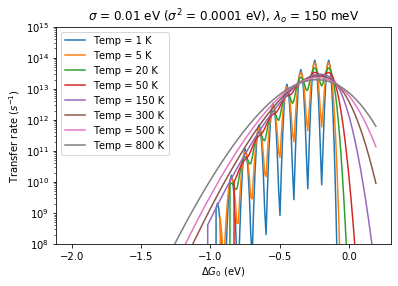

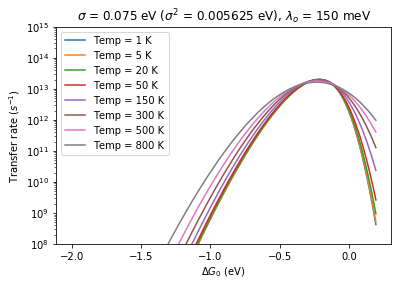

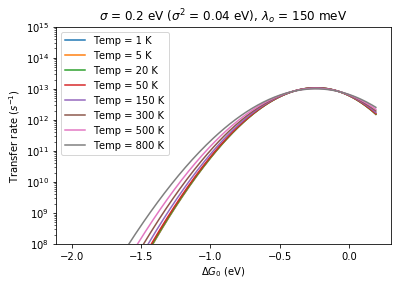

In [31]:
T_3 = [1, 5, 20, 50, 150, 300, 500, 800]

for t in T_3:
    MLJ_disorder_k_list_s = MLJ_disorder_transfer_rates(del_G0_list, t, lam_o, S_i, hbar_w_i, 0.01)
    plt.semilogy(del_G0_list, MLJ_disorder_k_list_s, label='Temp = '+str(t)+' K')
plt.ylim(10**8, 10**15)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.title('$\sigma$ = 0.01 eV ($\sigma^2$ = 0.0001 eV), $\lambda_{o}$ = 150 meV')
plt.legend()
plt.show()

for t in T_3:
    MLJ_disorder_k_list_s = MLJ_disorder_transfer_rates(del_G0_list, t, lam_o, S_i, hbar_w_i, 0.075)
    plt.semilogy(del_G0_list, MLJ_disorder_k_list_s, label='Temp = '+str(t)+' K')
plt.ylim(10**8, 10**15)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.title('$\sigma$ = 0.075 eV ($\sigma^2$ = 0.005625 eV), $\lambda_{o}$ = 150 meV')
plt.legend()
plt.show()

for t in T_3:
    MLJ_disorder_k_list_s = MLJ_disorder_transfer_rates(del_G0_list, t, lam_o, S_i, hbar_w_i, 0.2)
    plt.semilogy(del_G0_list, MLJ_disorder_k_list_s, label='Temp = '+str(t)+' K')
plt.ylim(10**8, 10**15)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.title('$\sigma$ = 0.2 eV ($\sigma^2$ = 0.04 eV), $\lambda_{o}$ = 150 meV')
plt.legend()
plt.show()